# Small example tensor-network codes and code distances

Note that running each function for the first time will include compilation time.  This can be a little slow for plots.

In [1]:
using TensorNetworkCodes
using TensorNetworkCodes.TNDistance

## Let's make a new little code

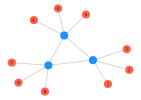

In [2]:
# Start with the five-qubit code
new_code = TensorNetworkCode(five_qubit_code())

# Contract with another five-qubit code (leg 5 of the first code with leg 1 of the second)
new_code = contract(new_code, TensorNetworkCode(five_qubit_code()), [[5,1]]);

# Contract with another five-qubit code
new_code = contract(new_code, TensorNetworkCode(five_qubit_code()), [[8,1]]);

# Contract two existing legs
new_code = fusion(new_code,[1,11])

# Let's see what the code looks like
code_plot(new_code;use_coords=false)

## Calculate distance

In [3]:
dist = tn_distance(new_code)
n = num_qubits(new_code)
k = Int64(length(new_code.logicals)/2)

println("This is a [[$n,$k,$dist]] code!")

This is a [[9,3,3]] code!


## How are the logical operators and stabilizers are distributed by weight?

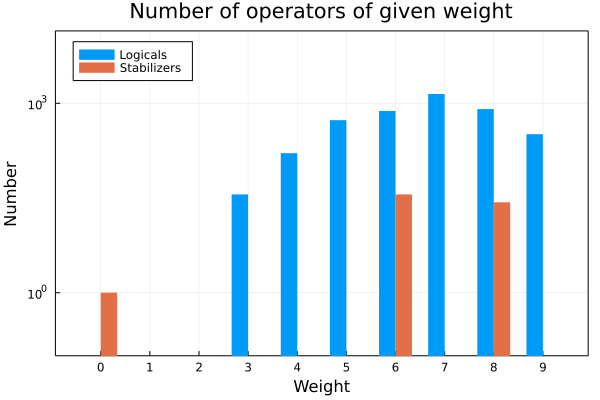

In [4]:
new_op_weights = tn_operator_weights(new_code)
operator_weights_plot(new_op_weights)

## Let's try another example

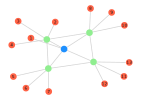

In [5]:
bigger_code = TensorNetworkCode(five_qubit_code())
ψ = TensorNetworkCode(purify(five_qubit_code())) # six-qubit stabilizer state

bigger_code = contract(bigger_code, TensorNetworkCode(purify(five_qubit_code())), [[1,4]])

bigger_code = contract(bigger_code, TensorNetworkCode(purify(five_qubit_code())), [[1,4]])

bigger_code = contract(bigger_code, TensorNetworkCode(purify(five_qubit_code())), [[8,4],[3,2]])

bigger_code = contract(bigger_code, TensorNetworkCode(purify(five_qubit_code())), [[13,4],[7,1],[2,2]])

bigger_code = fusion(bigger_code,[7,3])

# This extra contraction would give a code with the same distance but fewer physical qubits
# bigger_code = fusion(bigger_code,[2,3])

# Let's see what this looks like (re-run if the plot looks weird)
code_plot(bigger_code,use_coords = false)

## Let's find the code distance (re-run to eliminate compilation time)

In [6]:
@time bigger_code_weights = tn_operator_weights(bigger_code)

# Compare time to (brute-force search) distance function
# Run twice to discount compilation time!
@time bf_dist = find_distance_logicals(bigger_code)[1]

dist2 = bigger_code_weights.distance
n2 = num_qubits(bigger_code)
k2 = Int(length(bigger_code.logicals)/2)

println("This is a [[$n2,$k2,$dist2]] code!")

 13.411204 seconds (19.79 M allocations: 1.119 GiB, 3.64% gc time, 99.90% compilation time)
  1.658159 seconds (5.15 M allocations: 747.876 MiB, 11.51% gc time, 23.36% compilation time)
This is a [[13,1,5]] code!


## Let's plot the distribution of operator weights

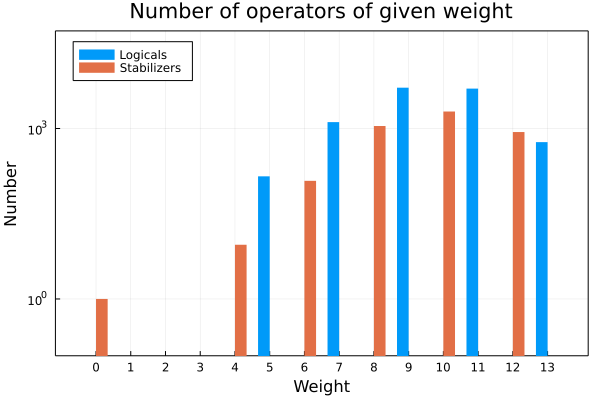

In [7]:
operator_weights_plot(bigger_code_weights)